In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

import warnings
warnings.filterwarnings('ignore')

In [4]:
sdf1 = pd.read_csv("spam.csv", encoding='ISO-8859-1')

sdf1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
sdf1.shape

(5572, 5)

In [6]:
sdf2 = pd.read_csv("spam_ham_dataset.csv")

sdf2.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
sdf2.shape

(5171, 4)

In [8]:
sdf1 = sdf1[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})



sdf2 = sdf2[['label', 'text']]

In [9]:
sdf1.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
sdf2.head(5)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [11]:
sdf = pd.concat([sdf1, sdf2], ignore_index=True)

In [12]:
sdf.sample(5)

,label,text
6875,ham,Subject: re : table and buffet\r\nis it very d...
2224,ham,"I prefer my free days... Tues, wed, fri oso ca..."
2363,spam,Fantasy Football is back on your TV. Go to Sky...
1293,ham,Happy birthday... May all ur dreams come true...
7656,ham,Subject: re : april 2001 spot purchases\r\nvan...


In [13]:
sdf['label'] = sdf['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [14]:
sdf.sample(5)

,label,text
3873,0,No. Did you multimedia message them or e-mail?
9896,0,Subject: meter 1558\r\ndaren - meter 1558 has ...
609,0,"It's fine, imma get a drink or somethin. Want ..."
380,0,I guess that's why you re worried. You must kn...
5422,0,Ok k..sry i knw 2 siva..tats y i askd..


In [15]:
sdf.isnull().sum()

,0
label,0
text,0


In [16]:
sdf = sdf.dropna()
print(sdf.isna().sum())

label    0
text     0
dtype: int64


In [17]:
sdf.duplicated().sum()

np.int64(581)

In [18]:
sdf = sdf.drop_duplicates(keep='first')
sdf.duplicated().sum()

np.int64(0)

In [19]:
sdf.shape

(10162, 2)

In [20]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10162 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10162 non-null  int64 
 1   text    10162 non-null  object
dtypes: int64(1), object(1)
memory usage: 238.2+ KB


In [21]:
sms_type_counts = sdf['label'].value_counts()

In [22]:
print(sms_type_counts)

label
0    8047
1    2115
Name: count, dtype: int64


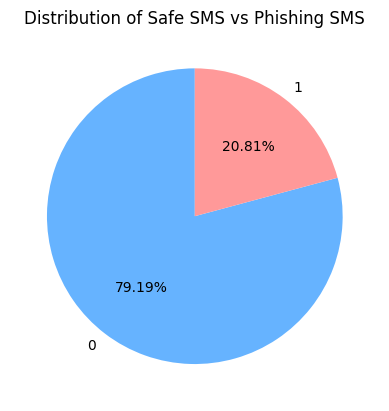

In [23]:
plt.pie(sms_type_counts, labels=sms_type_counts.index, autopct='%0.2f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Safe SMS vs Phishing SMS')
plt.show()

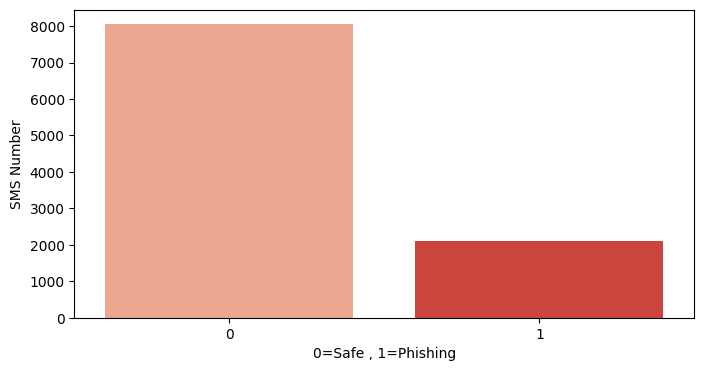

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(data=sdf, x='label', palette='Reds')
plt.xlabel("0=Safe , 1=Phishing")
plt.ylabel("SMS Number")
plt.show()

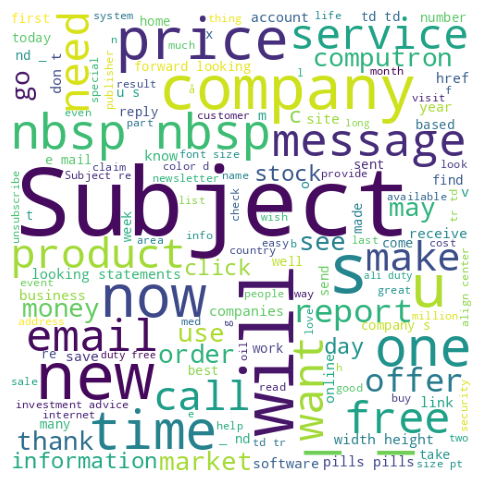

In [25]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
phishing_worldcloud = wc.generate(" ".join(sdf[sdf['label'] == 1]['text']))

plt.figure(figsize=(15, 6))
plt.imshow(phishing_worldcloud)
plt.axis('off')
plt.show()

In [26]:
import string
import re
import nltk
import nltk

# Download the necessary NLTK data packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def cleaned_data(text):
    # Convert to lowercase
    text = text.lower()


    # Remove non-alphanumeric characters except letters and numbers
    text = re.sub('[^a-zA-Z0-9]', ' ', text)

    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Tokenize the cleaned text
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)

    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [27]:
cleaned_data("Hello! Visit https://example.com for 50% OFF on your purchase!!! Don't miss out. Call us NOW at 123-456-7890 or email at sales@example.com.")

'hello visit exampl com 50 purchas miss call us 123 456 7890 email sale exampl com'

In [28]:
sdf['cleaned_text'] = sdf['text'].apply(cleaned_data)

In [29]:
sdf.sample(5)

,label,text,cleaned_text
4540,0,Hiya. How was last night? I've been naughty an...,hiya last night naughti bought cloth littl rea...
1496,0,I'm always on yahoo messenger now. Just send t...,alway yahoo messeng send messag get may send m...
10060,1,Subject: never worry about money ever again\r\...,subject never worri money ever 1 000 per day h...
3427,0,\Hi darlin did youPhone me? Im atHome if youwa...,hi darlin youphon im athom youwanna chat
6135,0,"Subject: hpl nom for sept . 14 , 2000\r\n( see...",subject hpl nom sept 14 2000 see attach file h...


In [30]:
sdf = sdf[['label', 'cleaned_text']]
sdf.sample(5)

,label,cleaned_text
1203,0,thank understand tri tell sura
7046,0,subject tenaska agreement darren know situat g...
9410,0,subject hpl nom june 9 2000 see attach file hp...
10539,0,subject dec 2000 meter 1351 daren flow meter 1...
4303,0,good good billi mate gone jog enjoy concert


In [31]:
# Save the DataFrame to a CSV file in the Kaggle working directory
sdf.to_csv('cleaned_sms.csv', index=False)
print("File saved as 'cleaned_sms.csv'.")

File saved as 'cleaned_sms.csv'.


In [32]:
sd = pd.read_csv('cleaned_sms.csv')

In [33]:
sd = sd.drop_duplicates(keep='first')
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9989 entries, 0 to 10161
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         9989 non-null   int64 
 1   cleaned_text  9988 non-null   object
dtypes: int64(1), object(1)
memory usage: 234.1+ KB


In [34]:
sd.sample(5)

,label,cleaned_text
9676,0,subject samson lone star limit daren tri proce...
3805,0,ya ok dinner
132,1,sunshin quiz wkli q win top soni dvd player u ...
411,0,alright head minut text meet
1849,0,time month mid time


In [35]:
# now counting the top words used in smishing
from collections import Counter
phishing = []
for msg in sd[sd['label'] == 1]['cleaned_text'].tolist():
    for word in msg.split():
        phishing.append(word)

Counter(phishing).most_common(10)

[('subject', 1618),
 ('3', 1258),
 ('com', 1036),
 ('2', 1028),
 ('http', 1000),
 ('compani', 921),
 ('1', 792),
 ('price', 745),
 ('0', 682),
 ('www', 665)]

In [36]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [37]:
sd = sd.dropna(subset=['cleaned_text'])
X = tfidf.fit_transform(sd['cleaned_text']).toarray()
X.shape

(9988, 5000)

In [38]:
print("Total features:", len(tfidf.get_feature_names_out()))

Total features: 5000


In [39]:
non_zero_indices = np.nonzero(X[0])[0]  # non-zero indices for the document
non_zero_words = tfidf.get_feature_names_out()[non_zero_indices]  # corresponding words
non_zero_tfidf_scores = X[0, non_zero_indices]  # TF-IDF scores for non-zero words


for word, score in zip(non_zero_words, non_zero_tfidf_scores):
    print(f"Word: {word}, TF-IDF Score: {score}")

Word: amor, TF-IDF Score: 0.4957771876426002
Word: avail, TF-IDF Score: 0.24402535882187232
Word: crazi, TF-IDF Score: 0.4007322842083509
Word: go, TF-IDF Score: 0.1950117939486273
Word: got, TF-IDF Score: 0.24718298400226665
Word: great, TF-IDF Score: 0.261297083644025
Word: la, TF-IDF Score: 0.33739746324082753
Word: point, TF-IDF Score: 0.26090356786040997
Word: wat, TF-IDF Score: 0.3208126382372871
Word: world, TF-IDF Score: 0.2860709331644918


In [40]:
y = sd['label'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [42]:
print(X_train.shape, X_test.shape)

(7990, 5000) (1998, 5000)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Initialize the classifier
rf = RandomForestClassifier()

# Fitting the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)


Accuracy: 0.9669669669669669
Confusion Matrix:
 [[1584   19]
 [  47  348]]
Precision (Weighted): 0.9666452831191871
Recall (Weighted): 0.9669669669669669
F1 Score (Weighted): 0.9665030609912499


In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Ensure no warnings with newer XGBoost versions

# Fit the model
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)


Accuracy: 0.9724724724724725
Confusion Matrix:
 [[1573   30]
 [  25  370]]
Precision (Weighted): 0.9726210096203838
Recall (Weighted): 0.9724724724724725
F1 Score (Weighted): 0.9725375378620532


In [45]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Assuming y_train and y_test are integer labels; convert to one-hot encoding if needed
num_classes = len(np.unique(y_train))
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if y is not one-hot
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=20, batch_size=32, verbose=1)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # For multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8508 - loss: 0.3567
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9922 - loss: 0.0280
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9985 - loss: 0.0097
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9986 - loss: 0.0051
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9997 - loss: 0.0019
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9994 - loss: 0.0047
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9990 - loss: 0.0042
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9995 - loss: 0.0031
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9995 - loss: 0.0035
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9995 - loss: 0.0025
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/